# Preparation

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/My Drive/2019_games_athletes.csv')

In [6]:
df.head()

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,gender,age,lastname,countryoforigincode,competitorname,overallrank,overallscore,division
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,016,9e218-P153604_4-184.jpg,153604,Mathew,M,29,Fraser,US,Mathew Fraser,1,984.0,Men
1,1.74,44800.0,United States,86.2,Peak 360 CrossFit,ACT,302,0a0bc-P2725_5-184.jpg,2725,Noah,M,28,Ohlsen,US,Noah Ohlsen,2,949.0,Men
2,1.55,44753.0,Iceland,83.9,CrossFit Hengill,ACT,122,4c5dc-P81616_4-184.jpg,81616,Björgvin Karl,M,26,Guðmundsson,IS,Björgvin Karl Guðmundsson,3,888.0,Men
3,1.80,44597.0,United States,84.8,CrossFit Mentality,ACT,105,e23e0-P34796_8-184.jpg,34796,Scott,M,31,Panchik,US,Scott Panchik,4,795.0,Men
4,1.55,44792.0,Australia,87.1,CrossFit Mode,ACT,303,b7c6d-P16080_7-184.jpg,16080,James,M,28,Newbury,AU,James Newbury,5,728.0,Men


In [0]:
# Remove some columns
cols=['height','countryoforiginname','weight','affiliatename','status','gender','age','countryoforigincode','overallrank','overallscore','division']
df.drop(df.columns.difference(cols), axis=1, inplace=True)

In [8]:
df.head()

,height,countryoforiginname,weight,affiliatename,status,gender,age,countryoforigincode,overallrank,overallscore,division
0,1.74,United States,88.5,CrossFit Mayhem,ACT,M,29,US,1,984.0,Men
1,1.74,United States,86.2,Peak 360 CrossFit,ACT,M,28,US,2,949.0,Men
2,1.55,Iceland,83.9,CrossFit Hengill,ACT,M,26,IS,3,888.0,Men
3,1.80,United States,84.8,CrossFit Mentality,ACT,M,31,US,4,795.0,Men
4,1.55,Australia,87.1,CrossFit Mode,ACT,M,28,AU,5,728.0,Men


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 11 columns):
height                 394 non-null float64
countryoforiginname    394 non-null object
weight                 394 non-null float64
affiliatename          357 non-null object
status                 394 non-null object
gender                 394 non-null object
age                    394 non-null int64
countryoforigincode    393 non-null object
overallrank            394 non-null object
overallscore           391 non-null float64
division               394 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 34.0+ KB


In [0]:
#We separate male and female
df_male=df[df['gender']=="M"]
df_female=df[df['gender']=="F"]

# Outliers

In [0]:
#Outliers male+female
def outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[[feature]] < (q1 - 1.5 * iqr)) |(df[[feature]] > (q3 + 1.5 * iqr))).any(axis=1)
    return outliers

In [0]:
#Outliers male
def outliers_iqr_m(df_male, feature):
    q1_m = df[feature].quantile(0.25)
    q3_m = df[feature].quantile(0.75)
    iqr_m = q3_m - q1_m
    outliers_m = ((df_male[[feature]] < (q1_m - 1.5 * iqr_m)) |(df_male[[feature]] > (q3_m + 1.5 * iqr_m))).any(axis=1)
    return outliers_m

#Outliers female
def outliers_iqr_f(df_female, feature):
    q1_f = df_female[feature].quantile(0.25)
    q3_f = df_female[feature].quantile(0.75)
    iqr_f = q3_f - q1_f
    outliers_f = ((df_female[[feature]] < (q1_f - 1.5 * iqr_f)) |(df_female[[feature]] > (q3_f + 1.5 * iqr_f))).any(axis=1)
    return outliers_f

# Evaluation metrics

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

def print_metrics(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'R2: {r2_score(y_true, y_pred)}')

# Simple linear regression

### Simple linear regression : Both male and female (with outliers)

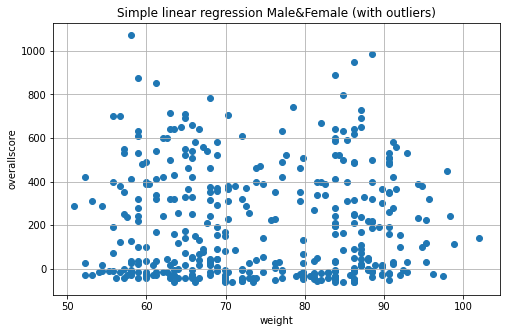

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(df['weight'], df['overallscore'])
plt.xlabel('weight')
plt.ylabel('overallscore')
plt.title("Simple linear regression Male&Female (with outliers)")
plt.grid()
plt.show()

### Simple linear regression : Male (with outliers)

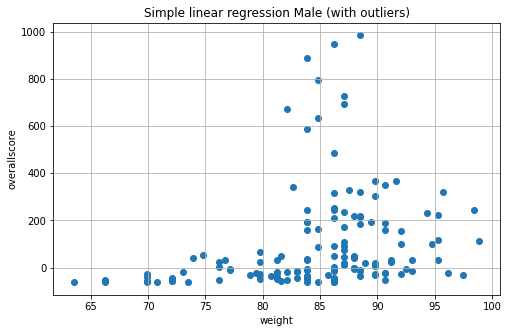

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(df_male['weight'], df_male['overallscore'])
plt.xlabel('weight')
plt.ylabel('overallscore')
plt.title("Simple linear regression Male (with outliers)")
plt.grid()
plt.show()

### Simple linear regression : Female (with outliers)

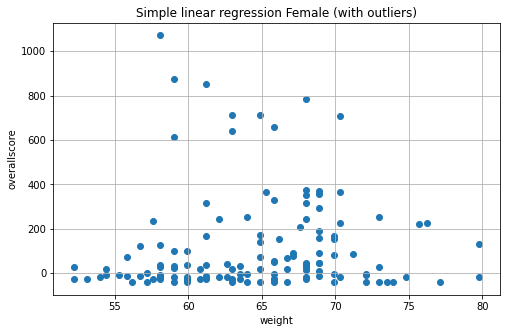

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(df_female['weight'], df_female['overallscore'])
plt.xlabel('weight')
plt.ylabel('overallscore')
plt.title("Simple linear regression Female (with outliers)")
plt.grid()
plt.show()

### Simple linear regression without outliers

In [0]:
non_outliers = ~outliers_iqr(df, 'weight')
non_outliers_m = ~outliers_iqr_m(df_male, 'weight')
non_outliers_f = ~outliers_iqr_f(df_female, 'weight')

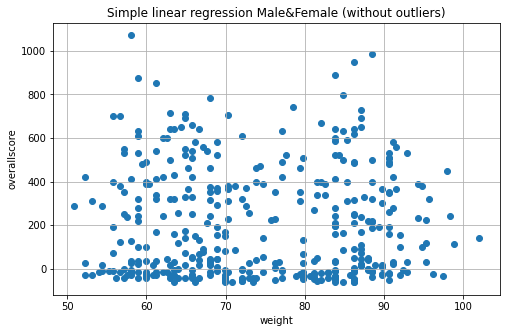

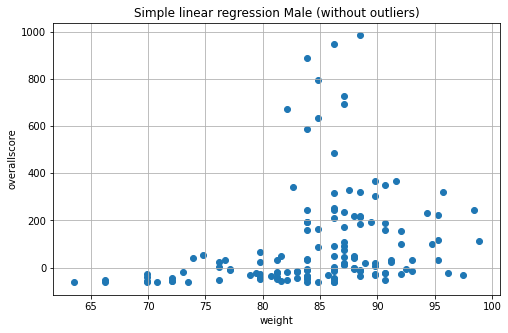

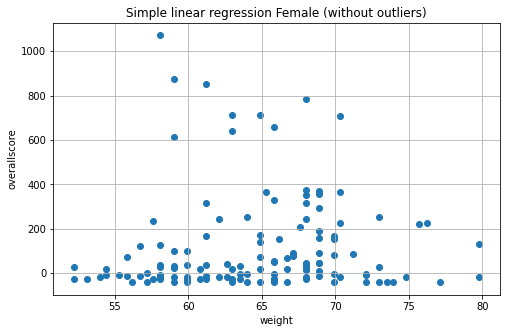

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(df[non_outliers]['weight'], df[non_outliers]['overallscore'])
plt.xlabel('weight')
plt.ylabel('overallscore')
plt.title("Simple linear regression Male&Female (without outliers)")
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df_male[non_outliers_m]['weight'], df_male[non_outliers_m]['overallscore'])
plt.xlabel('weight')
plt.ylabel('overallscore')
plt.title("Simple linear regression Male (without outliers)")
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df_female[non_outliers_f]['weight'], df_female[non_outliers_f]['overallscore'])
plt.xlabel('weight')
plt.ylabel('overallscore')
plt.title("Simple linear regression Female (without outliers)")
plt.grid()
plt.show()

In [0]:
#We drop any row with an NA value
new_df=df.dropna()
new_df_male=new_df[new_df['gender']=="M"]
new_df_female=new_df[new_df['gender']=="F"]

### Both male and female

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()
X = new_df[non_outliers]['weight'].values.reshape(-1, 1)
y = new_df[non_outliers]['overallscore'].values.reshape(-1, 1)
lr.fit(X, y)
y_pred = lr.predict(X)

print('Training error:')
print_metrics(y, lr.predict(X))

print()
print('Model parameters:')
print(lr.coef_, lr.intercept_)




Training error:
MAE: 214.37948611293402
MSE: 62668.11260987525
RMSE: 250.33599942851856
R2: 0.0006319871930231535

Model parameters:
[[-0.51545463]] [255.02743518]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Male

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()
X_m = new_df_male[non_outliers]['weight'].values.reshape(-1, 1)
y_m = new_df_male[non_outliers]['overallscore'].values.reshape(-1, 1)
lr.fit(X_m, y_m)
y_pred_m = lr.predict(X_m)

print('Training error:')
print_metrics(y_m, lr.predict(X_m))

print()
print('Model parameters:')
print(lr.coef_, lr.intercept_)

Training error:
MAE: 143.35173707041048
MSE: 44905.49309902244
RMSE: 211.90916237629378
R2: 0.05993551364046934

Model parameters:
[[8.03592858]] [-576.56729628]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Female

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()
X_f = new_df_female[non_outliers]['weight'].values.reshape(-1, 1)
y_f = new_df_female[non_outliers]['overallscore'].values.reshape(-1, 1)
lr.fit(X_f, y_f)
y_pred_f = lr.predict(X_f)

print('Training error:')
print_metrics(y_f, lr.predict(X_f))

print()
print('Model parameters:')
print(lr.coef_, lr.intercept_)

Training error:
MAE: 165.14762870345785
MSE: 53158.103991115946
RMSE: 230.56041288806702
R2: 0.001784938211010112

Model parameters:
[[1.63925525]] [18.71669344]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Train/test split

### All

In [23]:
from sklearn.model_selection import train_test_split

# Default proportions are 75% / 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)

print('Training error:')
print_metrics(y_train, lr.predict(X_train))

print()
print('Test error:')
print_metrics(y_test, lr.predict(X_test))

Training error:
MAE: 205.94513901841123
MSE: 56702.04684925018
RMSE: 238.1219159364593
R2: 0.00017762824018630052

Test error:
MAE: 235.03105756106842
MSE: 81382.95113010395
RMSE: 285.27697266008687
R2: -0.03621558548169368


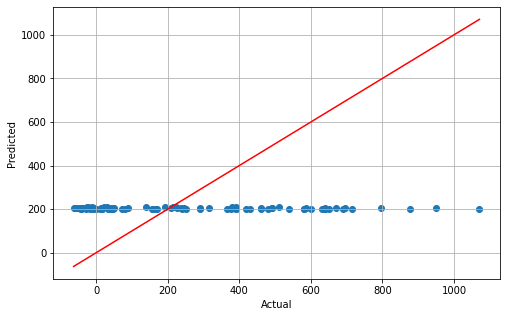

In [24]:
def plot_true_vs_pred(y_true, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()
    
plot_true_vs_pred(y_test, lr.predict(X_test))

### Male

In [25]:
from sklearn.model_selection import train_test_split

# Default proportions are 75% / 25%
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, random_state=100)
lr.fit(X_train_m, y_train_m)
# y_pred_m = lr.predict(X_test_m)

print('Training error:')
print_metrics(y_train_m, lr.predict(X_train_m))

print()
print('Test error:')
print_metrics(y_test_m, lr.predict(X_test_m))

Training error:
MAE: 164.12556983605467
MSE: 55445.3798001915
RMSE: 235.46842633395988
R2: 0.049244863097891445

Test error:
MAE: 100.69079963971706
MSE: 13919.169204315798
RMSE: 117.9795287510329
R2: -0.06246212093885517


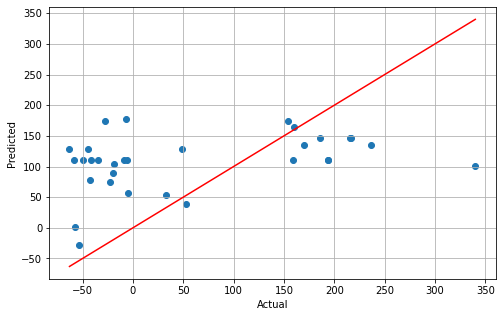

In [26]:
def plot_true_vs_pred(y_true_m, y_pred_m):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true_m, y_pred_m)
    plt.plot([y_true_m.min(), y_true_m.max()], [y_true_m.min(), y_true_m.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()
    
plot_true_vs_pred(y_test_m, lr.predict(X_test_m))

### Female

In [27]:
from sklearn.model_selection import train_test_split

# Default proportions are 75% / 25%
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, random_state=100)
lr.fit(X_train_f, y_train_f)
# y_pred_f = lr.predict(X_test_f)

print('Training error:')
print_metrics(y_train_f, lr.predict(X_train_f))

print()
print('Test error:')
print_metrics(y_test_f, lr.predict(X_test_f))

Training error:
MAE: 186.83270592037223
MSE: 62308.28717138789
RMSE: 249.61627986048484
R2: 2.32684794194693e-05

Test error:
MAE: 129.656859459998
MSE: 27574.899948373415
RMSE: 166.05691779740286
R2: -0.12697929660787155


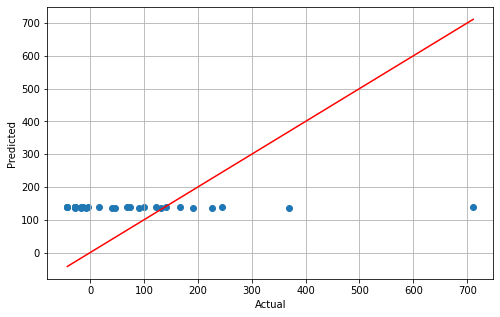

In [28]:
def plot_true_vs_pred(y_true_f, y_pred_f):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true_f, y_pred_f)
    plt.plot([y_true_f.min(), y_true_f.max()], [y_true_f.min(), y_true_f.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()
    
plot_true_vs_pred(y_test_f, lr.predict(X_test_f))

# Multiple linear regression

In [29]:
mlr_features = ['height', 'weight', 'age']

X = new_df[non_outliers][mlr_features].values
y = new_df[non_outliers]['overallscore'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

X_m = new_df_male[non_outliers][mlr_features].values
y_m = new_df_male[non_outliers]['overallscore'].values.reshape(-1, 1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, random_state=99)

X_f = new_df_female[non_outliers][mlr_features].values
y_f = new_df_female[non_outliers]['overallscore'].values.reshape(-1, 1)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, random_state=99)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will b

### All

Training error:
MAE: 171.84197960264513
MSE: 45920.39261370028
RMSE: 214.2904398560521
R2: 0.21401493957617523

Test error:
MAE: 196.57977665879494
MSE: 68079.99620851768
RMSE: 260.9214368512439
R2: 0.0971836640203736


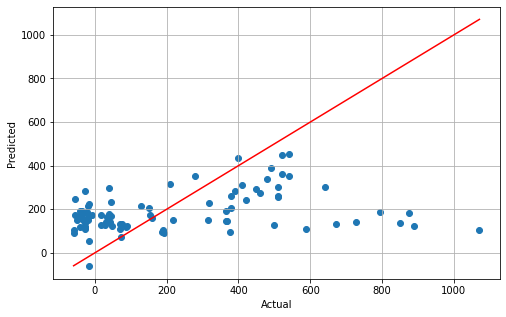

In [30]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print('Training error:')
print_metrics(y_train, mlr.predict(X_train))
print()
print('Test error:')
print_metrics(y_test, mlr.predict(X_test))

plot_true_vs_pred(y_test, mlr.predict(X_test))

### Male

Training error:
MAE: 127.75461241264351
MSE: 43690.509403861775
RMSE: 209.02274853197625
R2: 0.08041322678168406

Test error:
MAE: 174.99899396029406
MSE: 47365.221958587106
RMSE: 217.63552549753248
R2: -0.000579366068815812


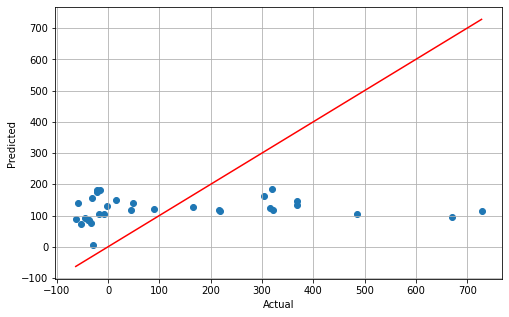

In [31]:
mlr = LinearRegression()
mlr.fit(X_train_m, y_train_m)

print('Training error:')
print_metrics(y_train_m, mlr.predict(X_train_m))
print()
print('Test error:')
print_metrics(y_test_m, mlr.predict(X_test_m))

plot_true_vs_pred(y_test_m, mlr.predict(X_test_m))

### Female

Training error:
MAE: 147.01566282890445
MSE: 46760.93786749052
RMSE: 216.24277529547783
R2: 0.045419496200769904

Test error:
MAE: 186.97640957182838
MSE: 62667.163735831615
RMSE: 250.33410422040305
R2: 0.029646581112261372


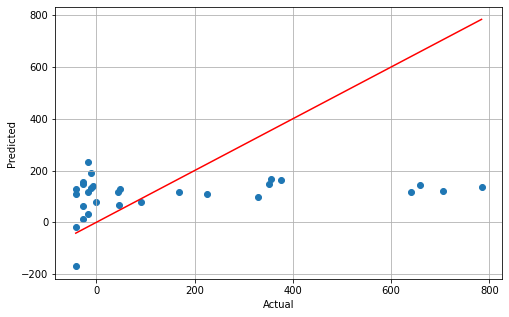

In [32]:
mlr = LinearRegression()
mlr.fit(X_train_f, y_train_f)

print('Training error:')
print_metrics(y_train_f, mlr.predict(X_train_f))
print()
print('Test error:')
print_metrics(y_test_f, mlr.predict(X_test_f))

plot_true_vs_pred(y_test_f, mlr.predict(X_test_f))

# Model selection


## Feature engineering


### Both male an female



Training error:
MAE: 167.37751048324583
MSE: 45186.67644539231
RMSE: 212.57157958060225
R2: 0.2265734111844826

Test error:
MAE: 197.21566924665902
MSE: 68576.49940425245
RMSE: 261.8711503855521
R2: 0.09059948039905674


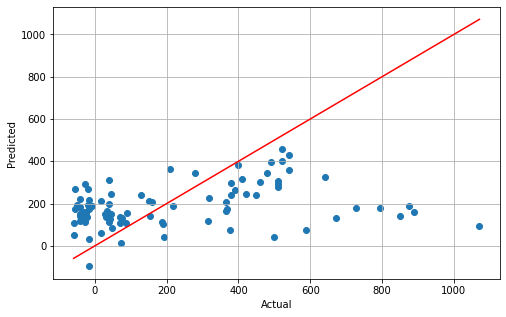

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features: 2nd degree
poly2 = PolynomialFeatures(degree=2)
X_train_p2 = poly2.fit_transform(X_train)
X_test_p2 = poly2.fit_transform(X_test)

mlr2 = LinearRegression(normalize=True)
mlr2.fit(X_train_p2, y_train)

print('Training error:')
print_metrics(y_train, mlr2.predict(X_train_p2))
print()
print('Test error:')
print_metrics(y_test, mlr2.predict(X_test_p2))

plot_true_vs_pred(y_test, mlr2.predict(X_test_p2))

Training error:
MAE: 158.30011789637555
MSE: 41224.279137982405
RMSE: 203.0376298570844
R2: 0.294394806207978

Test error:
MAE: 192.3755138015304
MSE: 71870.41610747288
RMSE: 268.08658322913675
R2: 0.046918487822099064


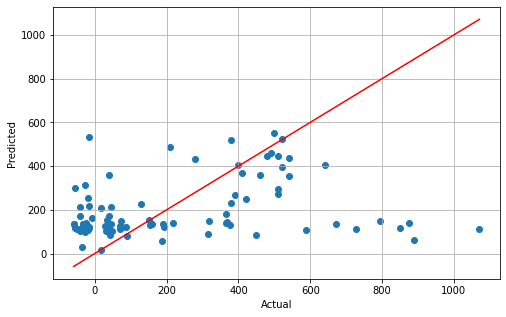

In [34]:
# Polynomial features: 3rd degree
poly3 = PolynomialFeatures(degree=3)
X_train_p3 = poly3.fit_transform(X_train)
X_test_p3 = poly3.fit_transform(X_test)

mlr3 = LinearRegression(normalize=True)
mlr3.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, mlr3.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, mlr3.predict(X_test_p3))

plot_true_vs_pred(y_test, mlr3.predict(X_test_p3))

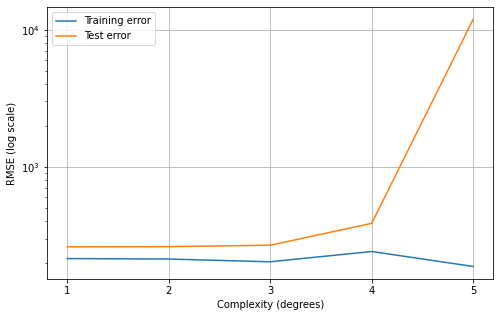

In [35]:
train_errors, test_errors = [], []
degrees = list(range(1, 6))

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)

    mlrp = LinearRegression(normalize=True)
    mlrp.fit(X_train_p, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, mlrp.predict(X_train_p)))
    test_error = np.sqrt(mean_squared_error(y_test, mlrp.predict(X_test_p)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, 5), degrees)
plt.xlabel('Complexity (degrees)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

### Male

Training error:
MAE: 133.11030113411897
MSE: 42351.12609957103
RMSE: 205.7938922795597
R2: 0.10860422724610852

Test error:
MAE: 180.87603376753864
MSE: 46560.04954026717
RMSE: 215.77777814285506
R2: 0.016429715163887804


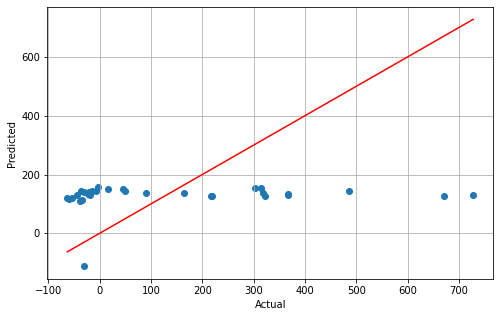

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features: 2nd degree
poly2 = PolynomialFeatures(degree=2)
X_train_p2_m = poly2.fit_transform(X_train_m)
X_test_p2_m = poly2.fit_transform(X_test_m)

mlr2 = LinearRegression(normalize=True)
mlr2.fit(X_train_p2_m, y_train_m)

print('Training error:')
print_metrics(y_train_m, mlr2.predict(X_train_p2_m))
print()
print('Test error:')
print_metrics(y_test_m, mlr2.predict(X_test_p2_m))

plot_true_vs_pred(y_test_m, mlr2.predict(X_test_p2_m))

Training error:
MAE: 130.27754841084086
MSE: 39121.05972496852
RMSE: 197.79044396777243
R2: 0.1765898459818599

Test error:
MAE: 196.83771749068663
MSE: 56355.97979612406
RMSE: 237.39414440150807
R2: -0.19050704729928536


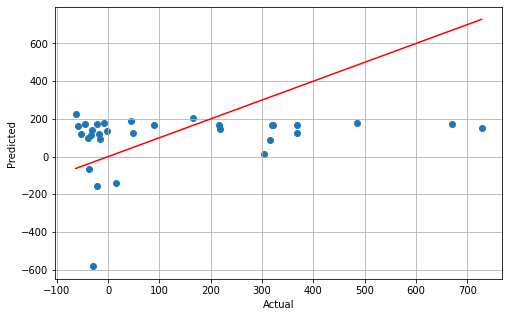

In [37]:
# Polynomial features: 3rd degree
poly3 = PolynomialFeatures(degree=3)
X_train_p3_m = poly3.fit_transform(X_train_m)
X_test_p3_m = poly3.fit_transform(X_test_m)

mlr3 = LinearRegression(normalize=True)
mlr3.fit(X_train_p3_m, y_train_m)

print('Training error:')
print_metrics(y_train_m, mlr3.predict(X_train_p3_m))
print()
print('Test error:')
print_metrics(y_test_m, mlr3.predict(X_test_p3_m))

plot_true_vs_pred(y_test_m, mlr3.predict(X_test_p3_m)) 

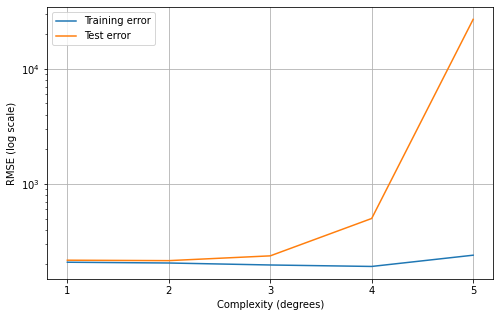

In [38]:
train_errors, test_errors = [], []
degrees = list(range(1, 6))

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_p_m = poly.fit_transform(X_train_m)
    X_test_p_m = poly.fit_transform(X_test_m)

    mlrp = LinearRegression(normalize=True)
    mlrp.fit(X_train_p_m, y_train_m)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train_m, mlrp.predict(X_train_p_m)))
    test_error = np.sqrt(mean_squared_error(y_test_m, mlrp.predict(X_test_p_m)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, 5), degrees)
plt.xlabel('Complexity (degrees)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

### Female

Training error:
MAE: 147.05229674740886
MSE: 45715.66764730306
RMSE: 213.81222520544296
R2: 0.06675770323631725

Test error:
MAE: 224.0067113901529
MSE: 100626.50414206496
RMSE: 317.2168093624059
R2: -0.5581249653579552


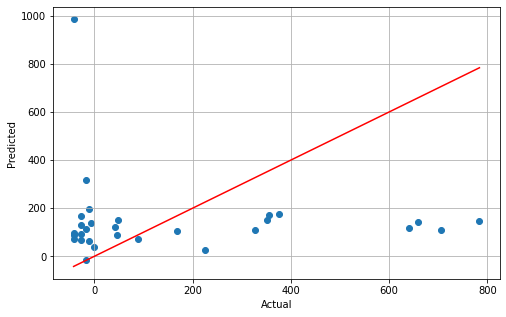

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features: 2nd degree
poly2 = PolynomialFeatures(degree=2)
X_train_p2_f = poly2.fit_transform(X_train_f)
X_test_p2_f = poly2.fit_transform(X_test_f)

mlr2 = LinearRegression(normalize=True)
mlr2.fit(X_train_p2_f, y_train_f)

print('Training error:')
print_metrics(y_train_f, mlr2.predict(X_train_p2_f))
print()
print('Test error:')
print_metrics(y_test_f, mlr2.predict(X_test_p2_f))

plot_true_vs_pred(y_test_f, mlr2.predict(X_test_p2_f))

Training error:
MAE: 135.84072887207319
MSE: 39966.3239192216
RMSE: 199.91579207061557
R2: 0.18412514030567717

Test error:
MAE: 830.8468638189305
MSE: 6687483.161113111
RMSE: 2586.0168524418227
R2: -102.5505959148731


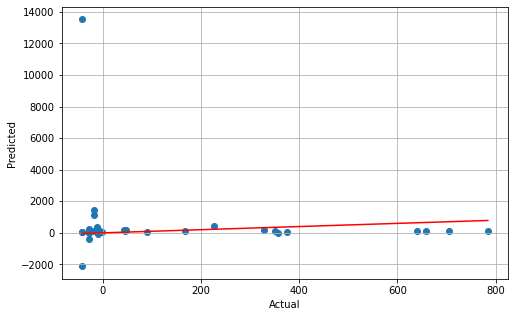

In [40]:
# Polynomial features: 3rd degree
poly3 = PolynomialFeatures(degree=3)
X_train_p3_f = poly3.fit_transform(X_train_f)
X_test_p3_f = poly3.fit_transform(X_test_f)

mlr3 = LinearRegression(normalize=True)
mlr3.fit(X_train_p3_f, y_train_f)

print('Training error:')
print_metrics(y_train_f, mlr3.predict(X_train_p3_f))
print()
print('Test error:')
print_metrics(y_test_f, mlr3.predict(X_test_p3_f))

plot_true_vs_pred(y_test_f, mlr3.predict(X_test_p3_f))

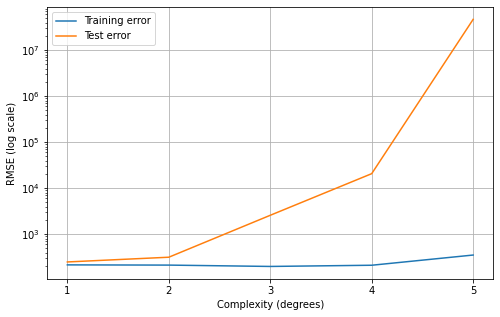

In [41]:
train_errors, test_errors = [], []
degrees = list(range(1, 6))

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_p_f = poly.fit_transform(X_train_f)
    X_test_p_f = poly.fit_transform(X_test_f)

    mlrp = LinearRegression(normalize=True)
    mlrp.fit(X_train_p_f, y_train_f)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train_f, mlrp.predict(X_train_p_f)))
    test_error = np.sqrt(mean_squared_error(y_test_f, mlrp.predict(X_test_p_f)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, 5), degrees)
plt.xlabel('Complexity (degrees)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

## Regularization

### Both male and female

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5786961.968784021, tolerance: 1542.3936484848484
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5786995.014106918, tolerance: 1542.3936484848484
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5787325.022219058, tolerance: 1542.3936484848484
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5790557.3

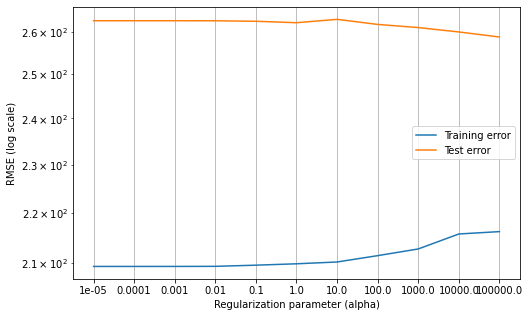

In [42]:
from sklearn.linear_model import Lasso

train_errors, test_errors = [], []
alphas = np.geomspace(1e-5, 1e5, 11)

# Using 3rd degree polynomial features
for alpha in alphas:
    rr = Lasso(alpha=alpha)
    rr.fit(X_train_p3, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, rr.predict(X_train_p3)))
    test_error = np.sqrt(mean_squared_error(y_test, rr.predict(X_test_p3)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, len(alphas)), alphas)
plt.xlabel('Regularization parameter (alpha)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

Training error:
MAE: 168.7814444781502
MSE: 45277.8280038517
RMSE: 212.7858736003208
R2: 0.22501323804340945

Test error:
MAE: 195.2445709725526
MSE: 68118.77663247025
RMSE: 260.99574064047533
R2: 0.0966693925425468


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4679784.195437066, tolerance: 1542.3936484848484
  positive)


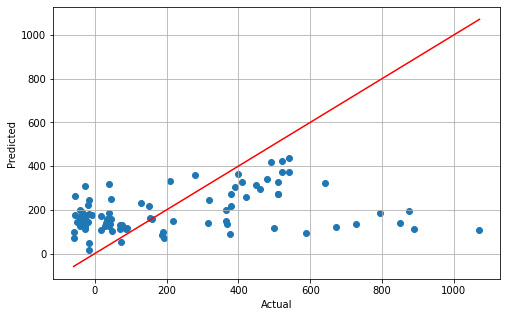

In [43]:
# Check with particular alpha value:
rr1 = Lasso(alpha=1000)
rr1.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, rr1.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, rr1.predict(X_test_p3))

plot_true_vs_pred(y_test, rr1.predict(X_test_p3))

### Male

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951400.3234858047, tolerance: 441.8525247311829
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951403.737685032, tolerance: 441.8525247311829
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951437.6258723687, tolerance: 441.8525247311829
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951762.55

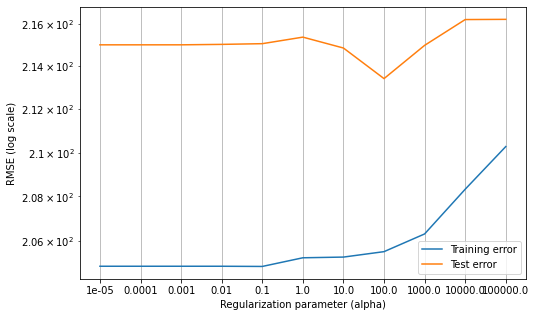

In [44]:
from sklearn.linear_model import Lasso

train_errors, test_errors = [], []
alphas = np.geomspace(1e-5, 1e5, 11)

# Using 3rd degree polynomial features
for alpha in alphas:
    rr = Lasso(alpha=alpha)
    rr.fit(X_train_p3_m, y_train_m)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train_m, rr.predict(X_train_p3_m)))
    test_error = np.sqrt(mean_squared_error(y_test_m, rr.predict(X_test_p3_m)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, len(alphas)), alphas)
plt.xlabel('Regularization parameter (alpha)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345966.0978394737, tolerance: 441.8525247311829
  positive)


Training error:
MAE: 131.76346945863583
MSE: 42561.55003804653
RMSE: 206.30450804101818
R2: 0.10417527749864985

Test error:
MAE: 179.1868287630108
MSE: 46213.69366249603
RMSE: 214.9737045838305
R2: 0.023746403026502882


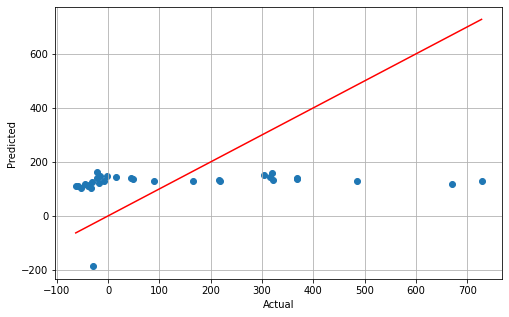

In [45]:
# Check with particular alpha value:
rr1 = Lasso(alpha=1000)
rr1.fit(X_train_p3_m, y_train_m)

print('Training error:')
print_metrics(y_train_m, rr1.predict(X_train_p3_m))
print()
print('Test error:')
print_metrics(y_test_m, rr1.predict(X_test_p3_m))

plot_true_vs_pred(y_test_m, rr1.predict(X_test_p3_m))

### Female

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944870.2897091135, tolerance: 416.3797294117647
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944880.120477157, tolerance: 416.3797294117647
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944978.0296131973, tolerance: 416.3797294117647
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1945917.23

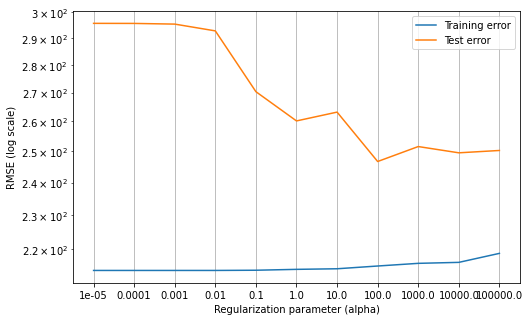

In [46]:
from sklearn.linear_model import Lasso

train_errors, test_errors = [], []
alphas = np.geomspace(1e-5, 1e5, 11)

# Using 3rd degree polynomial features
for alpha in alphas:
    rr = Lasso(alpha=alpha)
    rr.fit(X_train_p3_f, y_train_f)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train_f, rr.predict(X_train_p3_f)))
    test_error = np.sqrt(mean_squared_error(y_test_f, rr.predict(X_test_p3_f)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, len(alphas)), alphas)
plt.xlabel('Regularization parameter (alpha)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

Training error:
MAE: 147.58247928745064
MSE: 46620.57195325295
RMSE: 215.91797505824508
R2: 0.04828493413336321

Test error:
MAE: 188.20785861634198
MSE: 63303.1489015442
RMSE: 251.60117031036282
R2: 0.019798834012798694


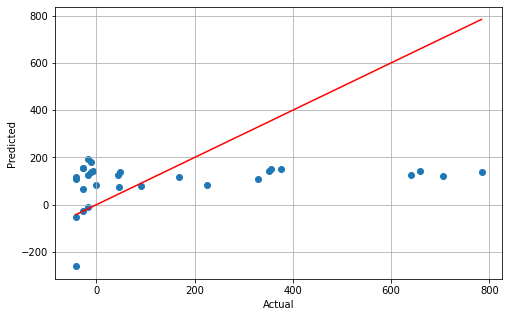

In [47]:
# Check with particular alpha value:
rr1 = Lasso(alpha=1000)
rr1.fit(X_train_p3_f, y_train_f)

print('Training error:')
print_metrics(y_train_f, rr1.predict(X_train_p3_f))
print()
print('Test error:')
print_metrics(y_test_f, rr1.predict(X_test_p3_f))

plot_true_vs_pred(y_test_f, rr1.predict(X_test_p3_f))

## Detecting outliers from residuals


### Both male and female

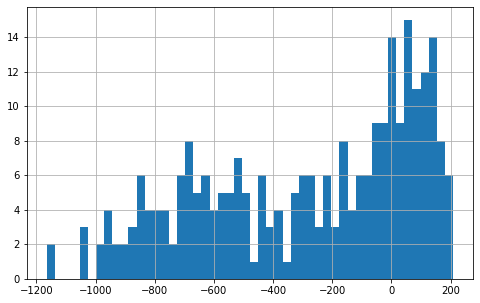

In [48]:
diffs = rr1.predict(X_train_p3) - y_train.reshape(-1)

plt.figure(figsize=(8, 5))
plt.hist(diffs, bins=50)
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1400738.4763705174, tolerance: 390.74456424581007
  positive)


Training error:
MAE: 120.26640063903325
MSE: 20997.997152245887
RMSE: 144.90685681583838
R2: 0.03808220659276451

Test error:
MAE: 199.6994735611421
MSE: 81284.51977692872
RMSE: 285.10440153903045
R2: -0.07792297890417421


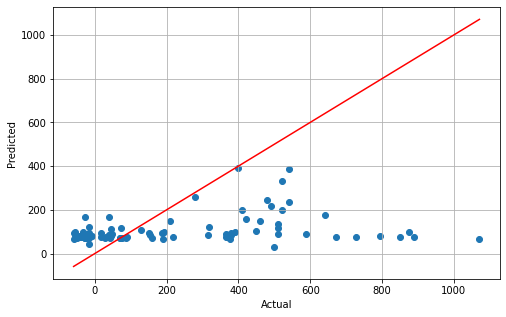

In [49]:
# Remove outliers from training set
mask = diffs > -500
X_train_p3_sub = X_train_p3[mask]
y_train_sub = y_train[mask]

# Re-train the model
rr2 = Lasso(alpha=1000)
rr2.fit(X_train_p3_sub, y_train_sub)

print('Training error:')
print_metrics(y_train_sub, rr2.predict(X_train_p3_sub))
print()
print('Test error:')
print_metrics(y_test, rr2.predict(X_test_p3))

plot_true_vs_pred(y_test, rr2.predict(X_test_p3))

Male

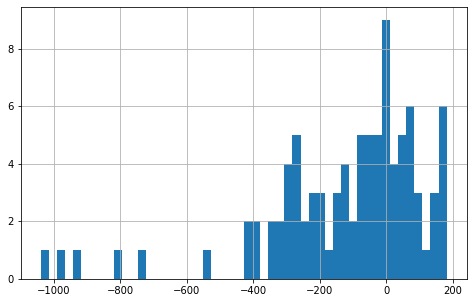

In [50]:
diffs_m = rr1.predict(X_train_p3_m) - y_train_m.reshape(-1)

plt.figure(figsize=(8, 5))
plt.hist(diffs_m, bins=50)
plt.grid()
plt.show()

### Female

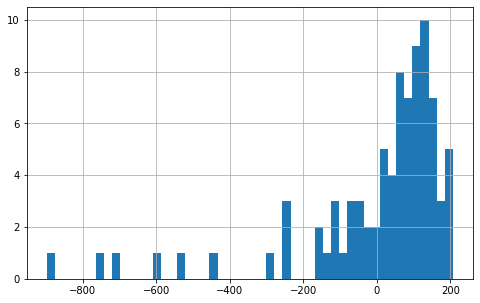

In [51]:
diffs_f = rr1.predict(X_train_p3_f) - y_train_f.reshape(-1)

plt.figure(figsize=(8, 5))
plt.hist(diffs_f, bins=50)
plt.grid()
plt.show()

## Feature importance


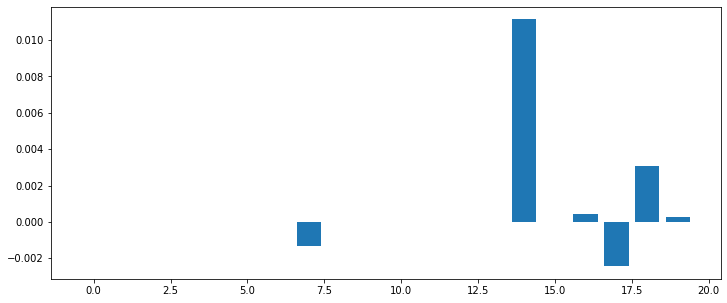

[ 0.          0.         -0.          0.         -0.          0.
  0.         -0.00135096 -0.          0.         -0.         -0.
 -0.          0.          0.01114095  0.          0.00045449 -0.00245339
  0.00304898  0.00024865]
0.003048975603462725
[0 1 2]


In [52]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(rr2.coef_)), rr2.coef_)
plt.show()

print(rr2.coef_)
print(rr2.coef_[-2])
print(poly3.powers_[-2])